In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_loss = np.load("./train_loss.npy")
train_acc = np.load("./train_acc.npy")
val_loss = np.load("./val_loss.npy")
val_acc = np.load("./val_loss.npy")

In [4]:
x_len = np.arange(len(val_loss))

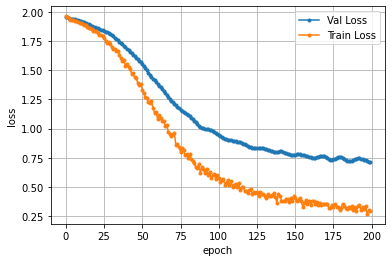

In [5]:
plt.plot(x_len, val_loss, marker='.', label="Val Loss")
plt.plot(x_len, train_loss, marker='.', label="Train Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [1]:
from model import GCN
from torch_geometric.datasets import Planetoid, NELL
import torch
import torch_geometric as tg

print(torch.__version__)
print(tg.__version__)

data = NELL(root = "./data/NELL")



1.12.1
2.3.1


In [2]:
import torch_geometric.utils as tgu
import torch.sparse as tss

In [4]:
graph = data[0]
adj_graph = tgu.to_torch_coo_tensor(graph['edge_index'])

adj_graph_loop = tgu.add_self_loops(adj_graph)[0]

In [12]:
tgu.is

Data(x=[65755, 61278, nnz=426664], edge_index=[2, 251550], y=[65755], train_mask=[65755], val_mask=[65755], test_mask=[65755])

In [6]:
tgu.is_undirected(graph)

c:\Users\user\anaconda3\lib\site-packages\torch_geometric\data\storage.py:304: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'y', 'test_mask', 'edge_index', 'x', 'train_mask', 'val_mask'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


KeyError: 0

In [143]:
data = Planetoid(root = "./data/CiteSeer", name = 'CiteSeer')
graph = data[0]
features = graph['x'].to_sparse_coo()
rowsum = tss.sum(features, dim = 1)

In [147]:
rowsum

tensor(indices=tensor([[   0,    1,    2,  ..., 3324, 3325, 3326]]),
       values=tensor([31., 33., 25.,  ..., 40., 36., 26.]),
       size=(3327,), nnz=3312, layout=torch.sparse_coo)

In [149]:
rowsum

tensor(indices=tensor([[   0,    1,    2,  ..., 3324, 3325, 3326]]),
       values=tensor([31., 33., 25.,  ..., 40., 36., 26.]),
       size=(3327,), nnz=3312, layout=torch.sparse_coo)

In [148]:
rowsum.values().shape

torch.Size([3312])

In [113]:
features.to_sparse_coo()

tensor(indices=tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
                       [  19,   81,  146,  ..., 1328, 1412, 1414]]),
       values=tensor([1., 1., 1.,  ..., 1., 1., 1.]),
       size=(2708, 1433), nnz=49216, layout=torch.sparse_coo)

In [77]:
features = graph['x'].to_torch_sparse_coo_tensor()
features

tensor(indices=tensor([[    0,     0,     0,  ..., 65752, 65753, 65754],
                       [    0,     1,     2,  ..., 61275, 61276, 61277]]),
       values=tensor([1., 1., 1.,  ..., 1., 1., 1.]),
       size=(65755, 61278), nnz=426664, layout=torch.sparse_coo)

In [81]:
rowsum = tss.sum(features, dim = 1)

In [89]:
features.coalesce().indices().shape

torch.Size([2, 426664])

In [97]:
indices_ = torch.stack([rowsum.indices(), rowsum.indices()]).reshape(2, -1)

In [98]:
indices_

tensor([[    0,     1,     2,  ..., 65752, 65753, 65754],
        [    0,     1,     2,  ..., 65752, 65753, 65754]])

In [100]:
rowsum_inv = torch.sparse_coo_tensor(indices = indices_, values = 1.0 / rowsum.values())

In [101]:
tss.mm(rowsum_inv, features)

tensor(indices=tensor([[    0,     0,     0,  ..., 65752, 65753, 65754],
                       [ 4544,  4330,  3896,  ..., 61275, 61276, 61277]]),
       values=tensor([0.0213, 0.0213, 0.0213,  ..., 1.0000, 1.0000, 1.0000]),
       size=(65755, 61278), nnz=426664, layout=torch.sparse_coo)

In [46]:
features = graph['x']
if type(data) == NELL :
    features = features.to_torch_sparse_coo_tensor() 
    rowsum = tss.sum(features, dim = 1).to_dense()
else :
    rowsum = features.sum(axis = 1)
    
rowsum_inv = 1/rowsum
if torch.isinf(rowsum_inv).sum() > 0 :
    rowsum_inv[torch.isinf(rowsum_inv)] = 0
    
rowsum_inv = torch.diag(rowsum_inv)

tensor(indices=tensor([[    0,     0,     0,  ..., 65752, 65753, 65754],
                       [    0,     1,     2,  ..., 61275, 61276, 61277]]),
       values=tensor([1., 1., 1.,  ..., 1., 1., 1.]),
       size=(65755, 61278), nnz=426664, layout=torch.sparse_coo)

In [47]:
rowsum_inv

tensor([[0.0213, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0278, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0135,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000]])

In [45]:
features

SparseTensor(row=tensor([    0,     0,     0,  ..., 65752, 65753, 65754]),
             col=tensor([    0,     1,     2,  ..., 61275, 61276, 61277]),
             val=tensor([1., 1., 1.,  ..., 1., 1., 1.]),
             size=(65755, 61278), nnz=426664, density=0.01%)

In [33]:
features.to_torch_sparse_coo_tensor() 

tensor(indices=tensor([[    0,     0,     0,  ..., 65752, 65753, 65754],
                       [    0,     1,     2,  ..., 61275, 61276, 61277]]),
       values=tensor([1., 1., 1.,  ..., 1., 1., 1.]),
       size=(65755, 61278), nnz=426664, layout=torch.sparse_coo)

In [42]:
tss.sum(features.to_torch_sparse_coo_tensor(), dim = 1).to_dense()

tensor([47., 36., 74.,  ...,  1.,  1.,  1.])

In [7]:
graph = data[0]

In [15]:
import torch_geometric.utils as tgu

In [2]:
ds = data[0]

In [5]:
data.get_summary()

Planetoid (#graphs=1):
+------------+----------+----------+
|            |   #nodes |   #edges |
|------------+----------+----------|
| mean       |     2708 |    10556 |
| std        |      nan |      nan |
| min        |     2708 |    10556 |
| quantile25 |     2708 |    10556 |
| median     |     2708 |    10556 |
| quantile75 |     2708 |    10556 |
| max        |     2708 |    10556 |
+------------+----------+----------+

In [3]:
fe

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [90]:
ds

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [91]:
ds['x']

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [14]:
ds['edge_index']

tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])

In [26]:
adj = tgu.to_torch_coo_tensor(ds['edge_index'])

In [35]:
adj_loop = tgu.add_self_loops(adj)

In [ ]:
tgu.to_

In [50]:
import torch.sparse as tss

In [56]:
tss.sum(torch.isinf(torch.pow(tss.sum(adj_loop[0], dim = 1), -1)))

tensor(0)

In [85]:
q = torch.mm(
    torch.diag((torch.pow(tss.sum(adj_loop[0], dim = 1), -1)).to_dense()).to_sparse_coo(),
    adj_loop[0]
)